In [1]:
import os
import numpy as np
import pandas as pd
import pickle
import torch

import matplotlib.pyplot as plt

In [27]:
!pwd

/mnt/vast-react/projects/agsinz_foundation_model_brain/goirik/Neuroformer


In [28]:
!ls

LICENSE			       neuroformer_extract_latents.ipynb
README.md		       neuroformer_inference.ipynb
configs			       neuroformer_inference.py
corr.py			       neuroformer_inference_multi.py
corr2.py		       neuroformer_train.py
create_experanto_dataset.py    neuroformer_train_experanto.py
data			       neuroformer_train_experanto_multisession.py
environment.yml		       requirements.txt
experanto_chunck_dataset.yaml  run.sbatch
images			       run_beh.sbatch
launch.sh		       run_inf.sbatch
load_result.ipynb	       setup_env.sh
models			       slurm_files
neuroformer		       wandb
neuroformer_analysis.ipynb


In [30]:
import sys

sys.path.append('/mnt/vast-react/projects/agsinz_foundation_model_brain/goirik/Neuroformer')

In [32]:
import sys

sys.path.append('/mnt/vast-react/projects/agsinz_foundation_model_brain/goirik/Neuroformer/neuroformer')

In [2]:
ckpt_path = "./models/train_8_1_sec"
path = "./models/train_8_1_sec/inference/results_trial_dynamic17797-8-5-Video-021a75e56847d574b9acbcc06c675055_30hz.pkl"

with open(path, 'rb') as f:
    results = pickle.load(f)

print(results.keys())

dict_keys(['true', 'ID', 'time', 'dt', 'Trial', 'Interval'])


In [49]:
print(len(results["ID"]))
print(len(results["true"]))

132328
137026


In [20]:
from neuroformer.analysis import get_rates
from neuroformer.utils import process_predictions

In [61]:
tokenizer_path = "".join([ckpt_path,'/tokenizer.pkl'])
with open(tokenizer_path, "rb") as f:    
    token = pickle.load(f)

tokenizer = token["dynamic17797-8-5-Video-021a75e56847d574b9acbcc06c675055_30hz"]
df_pred, _ = process_predictions(results, tokenizer.stoi, tokenizer.itos, 0)

rates = get_rates(df_pred, [9675, 9733], results['Interval'])

/mnt/vast-react/projects/agsinz_foundation_model_brain/goirik/Neuroformer/neuroformer/analysis.py:54: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df = df.groupby(["ID", interval]).count().unstack(fill_value=0).stack()["Time"]


In [63]:
rates

{9675: array([2., 2., 2., ..., 0., 0., 0.], shape=(132328,), dtype=float32),
 9733: array([2., 2., 2., ..., 0., 0., 0.], shape=(132328,), dtype=float32)}

In [60]:
len(rates[9675])

132328

In [59]:
df

(          ID        dt  Trial  Interval         Time
 0       9675  0.966667      0    1790.0  1790.966675
 1       9675  0.966667      0    1790.0  1790.966675
 2       9733  0.966667      0    1790.0  1790.966675
 3       9733  0.966667      0    1790.0  1790.966675
 4       9737  0.966667      0    1790.0  1790.966675
 ...      ...       ...    ...       ...          ...
 132295  9837  0.966667      0    1255.0  1255.966675
 132296  9876  0.966667      0    1255.0  1255.966675
 132297  9891  0.966667      0    1255.0  1255.966675
 132298  9908  0.966667      0    1255.0  1255.966675
 132299  9911  0.966667      0    1255.0  1255.966675
 
 [132300 rows x 5 columns],
             ID        dt
 0       9845.0  0.966667
 1       9845.0  0.966667
 2       9847.0  0.966667
 3       9847.0  0.966667
 4       9854.0  0.966667
 ...        ...       ...
 137021  9934.0  0.966667
 137022  9937.0  0.966667
 137023  9938.0  0.966667
 137024  9938.0  0.966667
 137025  9942.0       EOS
 
 [137026

ID
dt
Trial
Interval


(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.00

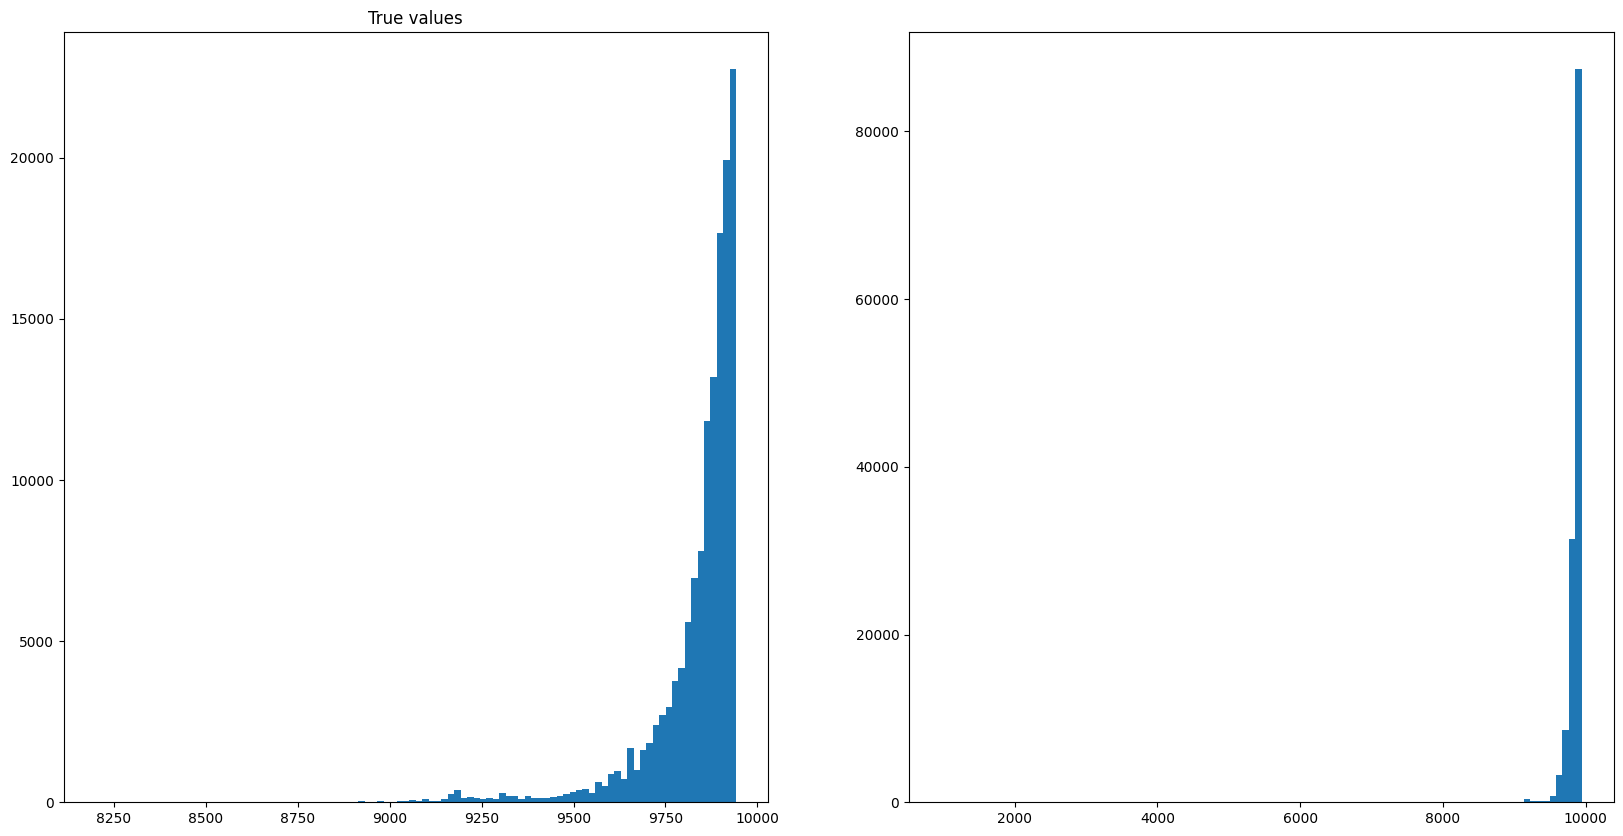

In [3]:
for key in results.keys():
    if isinstance(results[key], list) and all(isinstance(i, (int, float)) for i in results[key]):
        print(key)
        results[key] = torch.tensor(results[key]).cpu().numpy()
results['true'] = np.array([float(i.cpu()) for i in results['true']])
# plot distribution of true and predicted values
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.hist(results['true'], bins=100)
plt.title('True values')

plt.subplot(1, 2, 2)
plt.hist(results['ID'], bins=100)

In [4]:
len(results['ID'])
len(results['true'])

print(f"len ID: {len(results['ID'])}, len true: {len(results['true'])}")

len ID: 132328, len true: 137026


In [5]:
# print the frequency and ID of top 10 most frequent predictions

from collections import Counter

true_topk = Counter(results['true']).most_common(20)
pred_topk = Counter(results['ID']).most_common(20)

# data frame with true and predicted
df_topk = pd.DataFrame(true_topk, columns=['true', 'true_freq'])
df_topk['pred'] = [i[0] for i in pred_topk]
df_topk['pred_freq'] = [i[1] for i in pred_topk]
df_topk

# find common topk predictions
common_topk = []
for i in df_topk['true']:
    if i in df_topk['pred'].values:
        common_topk.append(i)

print(f"Common topk: {common_topk}")

Common topk: [9909.0, 9913.0, 9922.0, 9903.0, 9891.0, 9912.0, 9904.0, 9914.0]


In [6]:
# load_speed_predictions

speed_path = os.path.join(ckpt_path, 'inference', 'behavior_preds_speed.csv')
behavior_preds = pd.read_csv(speed_path)
behavior_preds.head()

FileNotFoundError: [Errno 2] No such file or directory: './models/train_8_1_sec/inference/behavior_preds_speed.csv'

In [8]:
from scipy.stats import pearsonr
# from neuroformer.visualize import set_plot_params
# from neuroformer.visualize import set_research_params
model_name = "Neuroformer"


x_true, y_true = behavior_preds['cum_interval'], behavior_preds['true']
x_pred, y_pred = behavior_preds['cum_interval'], behavior_preds['behavior_speed_value']

# pearson r
r, p = pearsonr([float(y) for y in y_pred], [float(y) for y in y_true])

# plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(y_true, y_pred, s=100, c='k', alpha=0.5)

# get the current axis limits after plotting your data
xlims = ax.get_xlim()
ylims = ax.get_ylim()
s_f = 0.8
# the line of perfect prediction should span the minimum to the maximum of the current x and y limits
combined_limits = [min(xlims[0], ylims[0]) * s_f, max(xlims[1], ylims[1]) * s_f]
ax.plot(combined_limits, combined_limits, 'k--', color='red')

ax.set_xlabel('True speed', fontsize=20)
ax.set_ylabel('Predicted speed', fontsize=20)
ax.set_title(f'{model_name}, Regression', fontsize=20)
# add pearson r to figure
ax.text(0.05, 0.9, 'r = {:.2f}'.format(r), fontsize=20, transform=ax.transAxes)
# add p to figure
ax.text(0.05, 0.8, 'p < 0.001'.format(p), fontsize=20, transform=ax.transAxes)

# axis limits = [-1.5, 1.5]
# ax.set_xlim(axis_limits)
# ax.set_ylim(axis_limits)
# plt.savefig(os.path.join(save_path, 'regression_2.pdf'), dpi=300, bbox_inches='tight')


# plot
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.scatter(y_true, y_pred, c='k', alpha=0.5)

# get the current axis limits after plotting your data
xlims = ax.get_xlim()
ylims = ax.get_ylim()
s_f = 0.8
# the line of perfect prediction should span the minimum to the maximum of the current x and y limits
combined_limits = [min(xlims[0], ylims[0]) * s_f, max(xlims[1], ylims[1]) * s_f]
ax.plot(combined_limits, combined_limits, 'k--', color='red')

ax.set_xlabel('True speed',)
ax.set_ylabel('Predicted speed',)
ax.set_title(f'{model_name}, Regression',)
# add pearson r to figure
ax.text(0.05, 0.9, 'r = {:.2f}'.format(r), transform=ax.transAxes)
# add p to figure
ax.text(0.05, 0.8, 'p < 0.001'.format(p), transform=ax.transAxes)

# axis limits = [-1.5, 1.5]
# ax.set_xlim(axis_limits)
# ax.set_ylim(axis_limits)
# plt.savefig(os.path.join(save_path, 'regression_2.pdf'), dpi=300, bbox_inches='tight')


# %%
plt.figure(figsize=(5, 2.5))
x = np.arange(len(behavior_preds))
plt.title(f'Speed Predictions, {model_name} Regression vs. True')
plt.plot(x, y_true, c='r', label='True')
plt.plot(x, y_pred, c='b', label='Regression')
plt.xlabel('Time (0.05s)')
plt.ylabel('Speed (z-scored)')
plt.legend(loc='upper left', framealpha=0.9)
# plt.savefig(os.path.join(save_path, 'speed_preds.pdf'), bbox_inches='tight')


plt.figure(figsize=(10, 5))
x = np.arange(len(behavior_preds))
plt.title(f'Speed Predictions, {model_name} Regression vs. True')
plt.plot(x, y_true, c='r', label='True')
plt.plot(x, y_pred, c='b', label='Regression')
plt.xlabel('Time (0.05s)')
plt.ylabel('Speed (z-scored)')
plt.legend(loc='upper left', framealpha=0.9)

NameError: name 'behavior_preds' is not defined